<a href="https://colab.research.google.com/github/snaiws/Project-1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다음 분기에 어떤 게임을 설계해야 할까
라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

데이터셋을 읽는 것 부터,
이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,
해당 내용을 기반으로 설명하는 영상을 작성하는 것이
이규호님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

이규호님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

*지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

*연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

*출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

배운내용
Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
Sprint 2 : Hypothesis Test, CI, Bayesian
Sprint 3 : DR, PCA, Cluster

발표영상의 시간은 5분으로 제한합니다.
발표영상 촬영 방법은 다른 문서를 참조하세요.
가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.
단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.

여러분이 생각하는 문제 (혹은 풀었으면 좋겠는 문제) 제시
그 문제에 대한 가설 및 사용한 데이터셋에 대한 설명
작업 결과 및 결론

발표 슬라이드
여러분이 진행하신 프로젝트를 설명하는 슬라이드를 만듭니다. 이 때 슬라이드에 들어가야 할 내용은 다음과 같습니다.

여러분이 생각하는 문제 (혹은 풀었으면 좋겠는 문제) 제시
그 문제에 대한 가설 및 사용한 데이터셋에 대한 설명
작업 결과 및 결론

어떤 모델을 어떤 코드로 짰냐 보다는,
문제 제시 및 그 문제를 해결하기 위해 사용한 방법과 결과들을 설명하는 방식으로 이루어집니다.
발표 시간이 5분이 넘으면 아무리 좋은 분석을 했어도 1점입니다.

In [ ]:
#데이터 전처리

#데이터 조사 결과 Year에 천,백의자리가 빠진 성분이 있었음
  #22이상은 1900을 더하고 22 아래는 2000을 더함
#Sales의 숫자값 뒤에 K나 M이 붙은 값들이 있었음(그래서 원본과 대조해보니 의미없는 값)
  #K,M제거함
#Sales의 값이 이상하게 높아서 봤더니 원래보다 *1000된 부분이 좀 있었음 0.02 0.03 0.04 0.05와 그 이상의 몇몇 값에 1000곱한듯함
  #세계에서 가장 많이 팔린 게임 테트리스는 없고 두 번째인 위 스포츠 Sales값을 참고하여(최대 41.49)
  #45를 기준으로 이것보다 큰 값을 가진 수를 1000으로 나누고
  #정확히 20, 30, 40인 값을 1000으로 나눔
#Feature에 Sales들의 sum을 추가
#Year, Genre, Publisher에 nan값이 있었음
  #드랍하기엔 Sales가 100만장 이상인 항목 중 nan값을 가진게 30개가 넘음
  #하지만 Sum_total의 0.5% 이상 차지하는 항목은 없음
  #그래서 year를 1979로, Genre와 Publisher는 Misc로 넣기로 함.(장르에 이미 Misc가 있음)
  #데이터 분석할 때 1979년 혹은 Misc에 해당하는 값이 유의미하게 커지면 데이터 조사를 다시 해보는걸로
  #100만장 이상은 찾아서 기입하고 그 아래의 nan값은 Misc로 하기로 함

#플랫폼이 PC, console, portable로 구분됨. Ptype 이라는 feature 추가

#라이브러리 불러오기
import pandas as pd
import numpy as np
from scipy.stats import chisquare
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings 
warnings.filterwarnings('ignore')



#데이터 불러오기
url='https://raw.githubusercontent.com/snaiws/ds-section1-sprint3/master/vgames2.csv?token=ANALH6V5SVWCK6ERF4YRXI3AXFXEC'
df=pd.read_csv(url)

#Year에서 천,백의 자리 빠진 값 보충
for i in range(len(df['Year'])):
  if np.isnan(df['Year'][i]) == True:
    continue
  if df['Year'][i]<22:
    df['Year'][i]=df['Year'][i]+2000
  if df['Year'][i]<100:
    df['Year'][i]=df['Year'][i]+1900

#Sales의 K,M 제거 후 형변환
def dels(z):
  for i in range(len(z)):
    if z[i].find('K')!=-1:
      z[i]=float(z[i][0:z[i].find('K')])
    elif z[i].find('M')!=-1:
      z[i]=float(z[i][0:z[i].find('M')])
    else:
      z[i]=float(z[i])
dels(df['NA_Sales'])
dels(df['EU_Sales'])
dels(df['JP_Sales'])
dels(df['Other_Sales'])

#Sales의 이상한 수치 수정
def val(z):
  for i in range(len(z)):
    if z[i] > 45 or z[i]==40 or z[i]==30 or z[i]==20 : #이거 기준을 아웃라이어로 해야 할듯
      z[i]=z[i]/1000
val(df['NA_Sales'])
val(df['EU_Sales'])
val(df['JP_Sales'])
val(df['Other_Sales'])

#새로운 feature인 sales total 추가 후 sales total 기준 내림차순으로 정렬 후 인덱스 수정
df['Sales_sum']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df = df.sort_values(by='Sales_sum' ,ascending=False)
df['index']=range(len(df['Name']))
df=df.set_index(df['index']).loc[:,'Name':'Sales_sum']

#NaN 처리
df['Year'].fillna(1979,inplace=True)
df['Genre'].fillna('Misc',inplace=True)
df['Publisher'].fillna('Misc',inplace=True)

#Ptype feature 추가
df['Ptype']=df['Platform']
df['Ptype']=df['Ptype'].replace('WS','portable').replace('GG','portable').replace('GB','portable').replace('GBA','portable').replace('DS','portable').replace('3DS','portable').replace('PSP','portable').replace('PSV','portable')
for i in range(len(df['Ptype'])):
  if df['Ptype'][i] != 'PC' and df['Ptype'][i] != 'portable' and df['Ptype'][i] != 'Misc':
    df['Ptype'][i] = 'console'

#object to float
df['NA_Sales']=df['NA_Sales'].astype(float)
df['EU_Sales']=df['EU_Sales'].astype(float)
df['JP_Sales']=df['JP_Sales'].astype(float)
df['Other_Sales']=df['Other_Sales'].astype(float)
df['Sales_sum']=df['Sales_sum'].astype(float)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum,Ptype
index,,,,,,,,,,,
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,console
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,console
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,console
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,console
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,portable
...,...,...,...,...,...,...,...,...,...,...,...
16593,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01,console
16594,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01,portable
16595,Davis Cup Tennis,GBA,2002.0,Sports,Ubisoft,0.01,0.00,0.00,0.00,0.01,portable


In [ ]:
#함수모음

def ele(z): #열 성분 중복없이 추출, input/output = 리스트
  a=list()
  for i in range(len(z)):
    b=0
    for j in range(len(a)):
      if z[i] == a[j]:
        b=b+1
    if b==0:
      a.append(z[i])
  return a
  
def ct(z): #열의 모든 성분의 타입 추출
  a=list()
  for i in range(len(z)):
    a.append(type(z[i]))
  return a

def standard(z): #정규화
  z=[(x-np.mean(z))/np.std(z,ddof=1) for x in z]
  return z

def flbc(m):#find location by corr, m is df
  a=list()
  coldex=m.columns
  for i in range(m.shape[0]): #세로길이
    for j in range(m.shape[1]): #가로길이
      if (m.iloc[i,j]>0.8 or m.iloc[i,j]<-0.8) and i>j :
        a.append([coldex[i],coldex[j]])
  return a

def indsum(df):
  a=ele(df.iloc[:,0])
  c=pd.DataFrame(a)
  for i in range(df.shape[1]-1):
    b=list()
    for j in range(len(a)):
      b.append(np.sum(df.loc[df.iloc[:,0] == a[j]].iloc[:,i+1]))
    c=pd.concat([c,pd.DataFrame(b)],axis=1)
  return c




In [ ]:
#가설검정
#t-test : onesample : 평균이 특정값과 일치하는지 twosample : 평균이 서로 같은지
#chi-square test ㅣ one : 분포가 특정 분포와 같은지, two : 서로 분포가 비슷한지 or 독립인지
#ABtest
#Cov, Corr, PCA, Clustering
#플랏 : 라인 바 박스 스캐터

#다음 분기에 어떤 게임을 설계해야 할까
#*지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다. ->지역별 sales와 장르의 연관성
  #귀무가설 : 지역별 선호하는 게임 장르가 같다.
  #f test
  #장르 지역sales
#*연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다. 연도 vs 장르 vs 세일
  #귀무가설 : 연도별 게임(카테고리)의 트렌드(출고량차이?변화?)는 없고 비슷비슷하다
  #연도 장르-totalsales
#*출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
  #tsales top 100
#어떤 장르 어떤 플랫폼 어떤 지역


In [ ]:
#1차 해석
#features
  #year(1980~2020, 1979)
  #장르(11종)
  #플랫폼(31종)
  #퍼블리셔(578종)
  #feature=['Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Sales_sum','Ptype'];
print(ele(df['Platform']))
print(ele(df['Year']))
print(ele(df['Genre']))
print(ele(df['Ptype']))


['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64', 'PS', 'PSP', 'PC', 'GC', 'XB', '2600', 'XOne', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0, 1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0, 2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0, 1993.0, 1994.0, 1982.0, 2003.0, 1986.0, 2000.0, 1979.0, 1995.0, 2016.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0, 2020.0, 2017.0]
['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']
['console', 'portable', 'PC']


In [ ]:
#2차 해석

#변수
  #Platform : categorical nomial unordered qualitative variable
  #Platform 하위 : uncontinuous quantative variable
  #Genre : categorical nomial unordered qualitative variable
  #Genre 하위 : uncontinuous quantative variable
  #Publisher : categorical nomial unordered qualitative variable
  #Publisher 하위 : uncontinuous quantative variable
  #Year : quantitive uncontinuous variable
  #Sales : quantitive continuous variable
  #Ptype : categorical nomial unordered qualitative variable

#비교,분석할 numerical value는 Year, tSales, rSales, number of elements of a category, bin of Sales

#tSales vs category 시각화
#tSales vs 연도 - 년도의 흐름에 따라 tSales의 분포가 증가할 것이다
#tSales vs 장르 - 장르에 따른 tsales의 분포는 uniformly distributed 할 것이다
#tSales vs 플랫폼 - 플랫폼에 따른 tsales의 분포는 uniformly distributed 할 것이다
#tSales vs 퍼블리셔 - 퍼블리셔에 따른 tsales의 분포는 uniformly distributed 할 것이다

#totalsale-categoryA vs categoryB -> f test 
#귀무가설 : A별 게임B의 트렌드가 없고 일정하다

#t플랫폼 vs 장르 - 기각
df2= df.loc[:,['Genre','Platform','Sales_sum']]
df2 = df2.pivot_table(index = 'Genre', columns = 'Platform', values = 'Sales_sum',aggfunc=np.sum)
df2.dropna(axis=1,inplace=True)
tPlvsG=df2.corr(method='pearson', min_periods=1) #성분간 강한 연관이 있는게 있다. 이것의 의미는 그 두 플랫폼은 장르에 따른 매출이 비슷하다 라는 것
tPlvsGcorr=flbc(tPlvsG) # 강한 상관관계가 있는 것들
print('tPlvsGcorr=',tPlvsGcorr)
tPlvsG_F=f_oneway(df2['3DS'],df2['DS'],df2['GBA'],df2['GC'],df2['N64'],df2['PC'],df2['PS'],df2['PS2'],df2['PS3'],df2['PS4'],df2['PSP'],df2['PSV'],df2['SAT'],df2['SNES'],df2['Wii'],df2['WiiU'],df2['X360'],df2['XB'])

#tPtype vs 장르 - 기각
df5= df.loc[:,['Genre','Ptype','Sales_sum']]
df5 = df5.pivot_table(index = 'Genre', columns = 'Ptype', values = 'Sales_sum',aggfunc=np.sum)
#df5.dropna(axis=1,inplace=True)
tPtvsG=df5.corr(method='pearson', min_periods=1)
tPtvsGcorr=flbc(tPtvsG) # 강한 상관관계가 없다
print('tPtvsGcorr=',tPtvsGcorr)
tPtvsG_F=f_oneway(df5['PC'],df5['console'],df5['portable'])

#tPtype vs 년도 - 기각
df7= df.loc[:,['Year','Ptype','Sales_sum']]
df7 = df7.pivot_table(index = 'Year', columns = 'Ptype', values = 'Sales_sum',aggfunc=np.sum)
df7.dropna(axis=0,inplace=True)
tPtvsY=df7.corr(method='pearson', min_periods=1)
tPtvsYcorr=flbc(tPtvsY) # 강한 상관관계가 없다
print('tPtvsYcorr=',tPtvsYcorr)
tPtvsY_F=f_oneway(df7['PC'],df7['console'],df7['portable'])

#t장르 vs 년도 - 기각x
df10= df.loc[:,['Year','Genre','Sales_sum']]
df10 = df10.pivot_table(index = 'Year', columns = 'Genre', values = 'Sales_sum',aggfunc=np.sum)
df10.dropna(axis=0,inplace=True)
tGvsY=df10.corr(method='pearson', min_periods=1)
tGvsYcorr=flbc(tGvsY) # 강한 상관관계가 없다
print('tGvsYcorr=',tGvsYcorr)
tGvsY_F=f_oneway(df10['Action'],df10['Adventure'],df10['Fighting'],df10['Platform'],df10['Puzzle'],df10['Racing'],df10['Role-Playing'],df10['Shooter'],df10['Simulation'],df10['Sports'],df10['Strategy'])

#t장르 vs Ptype
df11= df.loc[:,['Ptype','Genre','Sales_sum']]
df11 = df11.pivot_table(index = 'Ptype', columns = 'Genre', values = 'Sales_sum',aggfunc=np.sum)
#df11.dropna(axis=1,inplace=True) #드랍 필요없음
tGvsPt=df11.corr(method='pearson', min_periods=1)#성분간 강한 연관이 있는게 있다. 이것의 의미는 그 두 장르는 Ptype에 따른 매출이 비슷하다 라는 것
tGvsPtcorr=flbc(tGvsPt) # 강한 상관관계가 있다
print('tGvsPtcorr=',tGvsPtcorr)
tGvsPt_F=f_oneway(df11['Action'],df11['Adventure'],df11['Fighting'],df11['Platform'],df11['Puzzle'],df11['Racing'],df11['Role-Playing'],df11['Shooter'],df11['Simulation'],df11['Sports'],df11['Strategy'])

'''
#t플랫폼 vs 퍼블리셔 - 퍼블리셔에 따른 플랫폼판매량의 분포는 비슷하다 -> 기각시 비슷하지 않다 의미있는 통계다
df3= df.loc[:,['Publisher','Platform','Sales_sum']]
df3 = df3.pivot_table(index = 'Publisher', columns = 'Platform', values = 'Sales_sum',aggfunc=np.sum)
#df3.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tPlvsPu=df3.corr(method='pearson', min_periods=1) #성분간 강한 연관이 있는게 없다
tPlvsPucorr=flbc(tPlvsPu) # 강한 상관관계가 없다
print('tPlvsPucorr=',tPlvsPucorr)
#t플랫폼 vs 년도 - 년도에 따른 플랫폼판매량의 분포는 비슷하다 -> 기각시 비슷하지 않다 의미있는 통계다
df4= df.loc[:,['Year','Platform','Sales_sum']]
df4 = df4.pivot_table(index = 'Year', columns = 'Platform', values = 'Sales_sum',aggfunc=np.sum)
#df4.dropna(axis=0,inplace=True)#너무 많은 NaN값 존재
tPlvsY=df4.corr(method='pearson', min_periods=1)
tPlvsYcorr=flbc(tPlvsY) # 강한 상관관계가 없다
print('tPlvsYcorr=',tPlvsYcorr)
#tPtype vs 퍼블리셔
df6= df.loc[:,['Publisher','Ptype','Sales_sum']]
df6 = df6.pivot_table(index = 'Publisher', columns = 'Ptype', values = 'Sales_sum',aggfunc=np.sum)
#df6.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tPtvsPu=df6.corr(method='pearson', min_periods=1)
tPtvsPucorr=flbc(tPtvsPu) # 강한 상관관계가 없다
print('tPtvsPucorr=',tPtvsPucorr)
#t장르 vs 플랫폼 - 
df8= df.loc[:,['Platform','Genre','Sales_sum']]
df8 = df8.pivot_table(index = 'Platform', columns = 'Genre', values = 'Sales_sum',aggfunc=np.sum)
#df8.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tGvsPl=df8.corr(method='pearson', min_periods=1)
tGvsPlcorr=flbc(tGvsPl) # 강한 상관관계가 없다
print('tGvsPlcorr=',tGvsPlcorr)
#t장르 vs 퍼블리셔
df9= df.loc[:,['Publisher','Genre','Sales_sum']]
df9 = df9.pivot_table(index = 'Publisher', columns = 'Genre', values = 'Sales_sum',aggfunc=np.sum)
#df9.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tGvsPu=df9.corr(method='pearson', min_periods=1)
tGvsPucorr=flbc(tGvsPu) # 강한 상관관계가 없다
print('tGvsPucorr=',tGvsPucorr)
#t퍼블리셔 vs 플랫폼
df12= df.loc[:,['Platform','Publisher','Sales_sum']]
df12 = df12.pivot_table(index = 'Platform', columns = 'Publisher', values = 'Sales_sum',aggfunc=np.sum)
#df12.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tPuvsPl=df12.corr(method='pearson', min_periods=1)
tPuvsPlcorr=flbc(tPuvsPl) # 강한 상관관계가 없다
print('tPuvsPlcorr=',tPuvsPlcorr)
#t퍼블리셔 vs 장르
df13= df.loc[:,['Genre','Publisher','Sales_sum']]
df13 = df13.pivot_table(index = 'Genre', columns = 'Publisher', values = 'Sales_sum',aggfunc=np.sum)
#df13.dropna(axis=1,inplace=True)
tPuvsG=df13.corr(method='pearson', min_periods=1)#성분간 강한 연관이 있는게 있다. 이것의 의미는 그 두 퍼블리셔는 장르에 따른 매출이 비슷하다 라는 것
tPuvsGcorr=flbc(tPuvsG) # 강한 상관관계가 있다
print('tPuvsGcorr=',tPuvsGcorr)
#t퍼블리셔 vs 년도
df14= df.loc[:,['Year','Publisher','Sales_sum']]
df14 = df14.pivot_table(index = 'Year', columns = 'Publisher', values = 'Sales_sum',aggfunc=np.sum)
#df14.dropna(axis=0,inplace=True)#너무 많은 NaN값 존재
tPuvsY=df14.corr(method='pearson', min_periods=1)
tPuvsYcorr=flbc(tPuvsY) # 강한 상관관계가 없다
print('tPuvsYcorr=',tPuvsYcorr)
#t퍼블리셔 vs Ptype
df15= df.loc[:,['Ptype','Publisher','Sales_sum']]
df15 = df15.pivot_table(index = 'Ptype', columns = 'Publisher', values = 'Sales_sum',aggfunc=np.sum)
#df15.dropna(axis=1,inplace=True)
tPuvsPt=df15.corr(method='pearson', min_periods=1)#성분간 강한 연관이 있는게 있다. 이것의 의미는 그 두 퍼블리셔는 Ptype에 따른 매출이 비슷하다 라는 것
tPuvsPtcorr=flbc(tPuvsPt) # 강한 상관관계가 있다
print('tPuvsPtcorr=',tPuvsPtcorr)


#t년도 vs 플랫폼 ★ NaN값이 매우 많다, 플랫폼의 수명 을 보여준다
df16= df.loc[:,['Platform','Year','Sales_sum']]
df16 = df16.pivot_table(index = 'Platform', columns = 'Year', values = 'Sales_sum',aggfunc=np.sum)
df16.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tYvsPl=df16.corr(method='pearson', min_periods=1)
tYvsPlcorr=flbc(tYvsPl) # 강한 상관관계가 없다
print('tYvsPlcorr=',tYvsPlcorr)
#t년도 vs 퍼블리셔★
df18= df.loc[:,['Publisher','Year','Sales_sum']]
df18 = df18.pivot_table(index = 'Publisher', columns = 'Year', values = 'Sales_sum',aggfunc=np.sum)
#df18.dropna(axis=1,inplace=True)#너무 많은 NaN값 존재
tYvsPu=df18.corr(method='pearson', min_periods=1)
tYvsPucorr=flbc(tYvsPu) # 강한 상관관계가 없다
print('tYvsPucorr=',tYvsPucorr)
'''

#t년도 vs 장르 ★
df17= df.loc[:,['Genre','Year','Sales_sum']]
df17 = df17.pivot_table(index = 'Genre', columns = 'Year', values = 'Sales_sum',aggfunc=np.sum)
df17.dropna(axis=1,inplace=True)
tYvsG=df17.corr(method='pearson', min_periods=1)#성분간 강한 연관이 있는게 있다. 이것의 의미는 그 두 년도는 장르에 따른 매출이 비슷하다 라는 것
tYvsGcorr=flbc(tYvsG) # 강한 상관관계가 있다
print('tYvsGcorr=',tYvsGcorr)
tYvsG_F=f_oneway(df17[1991],df17[1992],df17[1993],df17[1994],df17[1995],df17[1996],df17[1997],df17[1998],df17[1999],df17[2000],df17[2001],df17[2002],df17[2003],df17[2004],df17[2005],df17[2006],df17[2007],df17[2008],df17[2009],df17[2010],df17[2011],df17[2012],df17[2013],df17[2014],df17[2015])

#t년도 vs Ptype★
df19= df.loc[:,['Ptype','Year','Sales_sum']]
df19 = df19.pivot_table(index = 'Ptype', columns = 'Year', values = 'Sales_sum',aggfunc=np.sum)
df19.dropna(axis=1,inplace=True)
tYvsPt=df19.corr(method='pearson', min_periods=1)#성분간 강한 연관이 있는게 있다. 이것의 의미는 그 두 년도는 Ptype에 따른 매출이 비슷하다 라는 것
tYvsPtcorr=flbc(tYvsPt) # 강한 상관관계가 있다
print('tYvsPtcorr=',tYvsPtcorr)
tYvsPt_F=f_oneway(df19[1985],df19[1988],df19[1992],df19[1994],df19[1995],df19[1996],df19[1997],df19[1998],df19[1999],df19[2000],df19[2001],df19[2002],df19[2003],df19[2004],df19[2005],df19[2006],df19[2007],df19[2008],df19[2009],df19[2010],df19[2011],df19[2012],df19[2013],df19[2014],df19[2015],df19[2016])


#regionsale vs category - f test
#귀무가설 : 지역에 따라 선호 게임(category)가 같다

#rs vs 플랫폼 - 기각
df20 = df.loc[:,['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df20=indsum(df20)
df20.columns=['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df20.set_index('Platform',inplace=True)
PlvsRS_F=f_oneway(df20['NA_Sales'],df20['EU_Sales'],df20['JP_Sales'],df20['Other_Sales'])
#rs vs 장르 ★ 기각
df21 = df.loc[:,['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df21=indsum(df21)
df21.columns=['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df21.set_index('Genre',inplace=True)
GvsRS_F=f_oneway(df21['NA_Sales'],df21['EU_Sales'],df21['JP_Sales'],df21['Other_Sales'])
#rs vs 년도 - 기각
df22 = df.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df22=indsum(df22)
df22.columns=['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df22.set_index('Year',inplace=True)
YvsRS_F=f_oneway(df22['NA_Sales'],df22['EU_Sales'],df22['JP_Sales'],df22['Other_Sales'])
#rs vs 퍼블리셔 - 기각
df23 = df.loc[:,['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df23=indsum(df23)
df23.columns=['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df23.set_index('Publisher',inplace=True)
PuvsRS_F=f_oneway(df23['NA_Sales'],df23['EU_Sales'],df23['JP_Sales'],df23['Other_Sales'])
#rs vs Ptype - 기각x
df24 = df.loc[:,['Ptype','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df24=indsum(df24)
df24.columns=['Ptype','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df24.set_index('Ptype',inplace=True)
PtvsRS_F=f_oneway(df24['NA_Sales'],df24['EU_Sales'],df24['JP_Sales'],df24['Other_Sales'])



tPlvsGcorr= [['GBA', '3DS'], ['PS2', 'GC'], ['PS2', 'PS'], ['PS3', 'GC'], ['PS4', 'PS3'], ['PSP', 'PS'], ['PSP', 'PS2'], ['PSV', 'PSP'], ['WiiU', 'GC'], ['X360', 'PS3'], ['X360', 'PS4'], ['XB', 'PS3'], ['XB', 'PS4'], ['XB', 'X360']]
tPtvsGcorr= []
tPtvsYcorr= [['portable', 'console']]
tGvsYcorr= [['Misc', 'Adventure'], ['Shooter', 'Action'], ['Simulation', 'Misc'], ['Simulation', 'Puzzle'], ['Sports', 'Misc']]
tGvsPtcorr= [['Fighting', 'Action'], ['Misc', 'Action'], ['Misc', 'Adventure'], ['Misc', 'Fighting'], ['Platform', 'Action'], ['Platform', 'Adventure'], ['Platform', 'Fighting'], ['Platform', 'Misc'], ['Puzzle', 'Adventure'], ['Racing', 'Action'], ['Racing', 'Fighting'], ['Racing', 'Misc'], ['Racing', 'Platform'], ['Role-Playing', 'Adventure'], ['Role-Playing', 'Misc'], ['Role-Playing', 'Platform'], ['Role-Playing', 'Puzzle'], ['Shooter', 'Action'], ['Shooter', 'Fighting'], ['Shooter', 'Misc'], ['Shooter', 'Platform'], ['Shooter', 'Racing'], ['Simulation', 'Adventure'], ['Simulat

In [ ]:
(tYvsG_F,tYvsPt_F,tPlvsG_F,tPtvsG_F,tPtvsY_F,tGvsY_F,tGvsPt_F)

(F_onewayResult(statistic=5.207428950017051, pvalue=1.886641365255221e-12),
 F_onewayResult(statistic=0.7250892559971256, pvalue=0.8074425391863829),
 F_onewayResult(statistic=5.227169910500004, pvalue=1.8898946086109917e-09),
 F_onewayResult(statistic=13.366795170725425, pvalue=5.59593667524491e-05),
 F_onewayResult(statistic=46.02899609784036, pvalue=6.286438377196204e-14),
 F_onewayResult(statistic=16.25881634351637, pvalue=5.85510791912265e-23),
 F_onewayResult(statistic=0.6008021488497898, pvalue=0.796381697288864))

In [ ]:
(PlvsRS_F,GvsRS_F,YvsRS_F,PuvsRS_F,PtvsRS_F)

(F_onewayResult(statistic=6.5633466089567944, pvalue=0.00038018368161266017),
 F_onewayResult(statistic=8.726767944248904, pvalue=0.00011780318116774667),
 F_onewayResult(statistic=14.40933529650218, pvalue=2.4704696343599862e-08),
 F_onewayResult(statistic=4.309450197560952, pvalue=0.004868982218032098),
 F_onewayResult(statistic=0.8044330524679015, pvalue=0.5257444240219884))

In [ ]:
df20=df20.apply(standard)
PlvsRS_F=f_oneway(df20['NA_Sales'],df20['EU_Sales'],df20['JP_Sales'],df20['Other_Sales'])
df21=df21.apply(standard)

GvsRS_F=f_oneway(df21['NA_Sales'],df21['EU_Sales'],df21['JP_Sales'],df21['Other_Sales'])
df22=df22.apply(standard)

YvsRS_F=f_oneway(df22['NA_Sales'],df22['EU_Sales'],df22['JP_Sales'],df22['Other_Sales'])
df23=df23.apply(standard)

PuvsRS_F=f_oneway(df23['NA_Sales'],df23['EU_Sales'],df23['JP_Sales'],df23['Other_Sales'])
df24=df24.apply(standard)

PtvsRS_F=f_oneway(df24['NA_Sales'],df24['EU_Sales'],df24['JP_Sales'],df24['Other_Sales'])
df2=df2.apply(standard)
df5=df5.apply(standard)
df7=df7.apply(standard)
df11=df11.apply(standard)
df17=df17.apply(standard)

(PlvsRS_F,GvsRS_F,YvsRS_F,PuvsRS_F,PtvsRS_F)

(F_onewayResult(statistic=1.504561323264268e-30, pvalue=1.0),
 F_onewayResult(statistic=1.8043823656747968e-31, pvalue=1.0),
 F_onewayResult(statistic=4.253275047316622e-30, pvalue=1.0),
 F_onewayResult(statistic=1.8607126033385713e-28, pvalue=1.0),
 F_onewayResult(statistic=2.0200865194461676e-32, pvalue=1.0))

In [ ]:
#출고량 100만장 이상을 기준으로
df1=df.loc[df['Sales_sum']>=1]

df25=pd.crosstab(df1['Year'],df1['Platform'])#
df26=pd.crosstab(df1['Year'],df1['Genre'])#
df27=pd.crosstab(df1['Year'],df1['Publisher'])
df28=pd.crosstab(df1['Year'],df1['Ptype'])#
df29=pd.crosstab(df1['Genre'],df1['Platform'])#
df30=pd.crosstab(df1['Genre'],df1['Publisher'])
df31=pd.crosstab(df1['Genre'],df1['Ptype'])#PC console portable의 비율을 통해 포터블로 만들기 쉬운것 어려운것 대략적으로 알 수 있음
df32=pd.crosstab(df1['Ptype'],df1['Publisher'])
df33=pd.crosstab(df1['Platform'],df1['Publisher'])
df21

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Sports,690.51,386.47,135.37,144.66
Platform,446.44,201.61,130.65,51.53
Racing,357.19,237.10,56.40,87.09
Role-Playing,319.54,183.58,344.95,86.93
Puzzle,133.34,50.73,56.87,12.52
Misc,428.66,225.48,128.14,89.57
Shooter,581.92,323.04,38.28,102.65
Simulation,182.96,113.35,63.70,51.46
Action,874.81,532.15,167.89,196.44


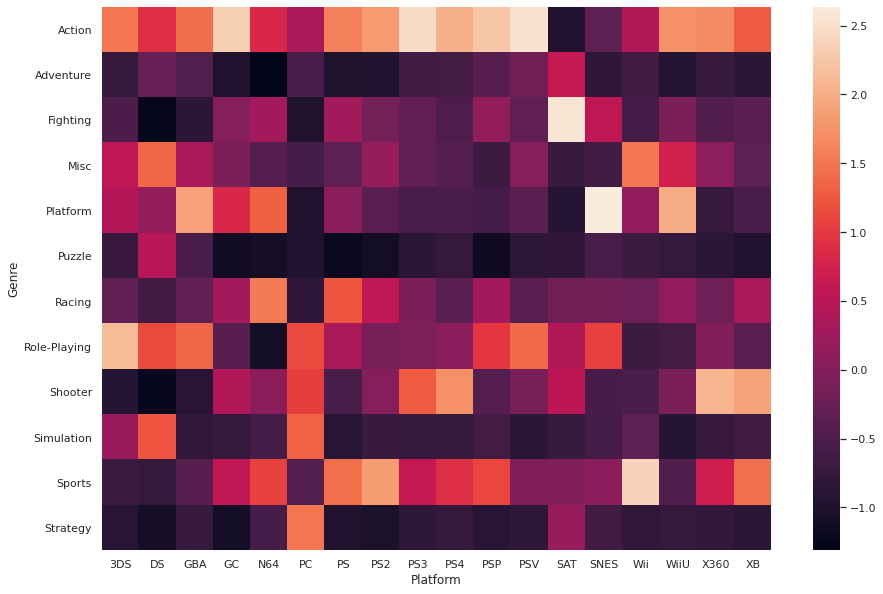

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(df2,xticklabels=1,yticklabels=1)


In [ ]:
df1=indsum(df1.loc[:,['Publisher','Sales_sum']])
df1.columns=['pu','Sales_sum']
df1=df1.sort_values(by='Sales_sum' ,ascending=False)
df1

,pu,Sales_sum
0,Nintendo,1654.18
8,Electronic Arts,759.45
4,Activision,499.30
3,Sony Computer Entertainment,456.72
2,Take-Two Interactive,306.91
...,...,...
99,GSP,1.07
100,Play It,1.06
101,Slightly Mad Studios,1.03
102,Tomy Corporation,1.02


In [ ]:
df.loc[df['Publisher']=='Electronic Arts'].loc[df['Platform']=='PS4']


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum,Ptype
index,,,,,,,,,,,
98,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,console
112,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,console
144,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60,console
241,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78,console
406,Battlefield 4,PS4,2013.0,Shooter,Electronic Arts,1.34,1.54,0.17,0.38,3.43,console
438,Madden NFL 16,PS4,2015.0,Sports,Electronic Arts,2.33,0.30,0.00,0.59,3.22,console
516,FIFA 14,PS4,2013.0,Sports,Electronic Arts,0.61,1.85,0.11,0.33,2.90,console
675,Need for Speed (2015),PS4,2015.0,Racing,Electronic Arts,0.49,1.49,0.05,0.36,2.39,console
815,Battlefield: Hardline,PS4,2015.0,Shooter,Electronic Arts,0.70,0.93,0.14,0.32,2.09,console
